In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import sweetviz as sv

# df_EDA = pd.read_csv('../../loan_project/SBAnational.csv')
n = 5000  # Nombre de lignes à échantillonner
skip = sorted(np.random.choice(range(1, 900001), 900000 - n, replace=False))
df_EDA = pd.read_csv('../../loan_project/SBAnational.csv', usecols=['State', 'Zip', 'BankState', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv', 'NAICS'], skiprows=skip)

In [2]:
# df_EDA = df_EDA.drop(['Name','ChgOffDate', 'DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'],axis=1)
df_EDA.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,MA,2114,NC,812320,1997,60,40,1,1,0,0,N,P I F,"$25,000.00","$12,500.00"
1,RI,2808,RI,484110,2006,36,1,2,1,2,Y,N,P I F,"$30,000.00","$15,000.00"
2,NH,3060,OH,541330,1999,60,5,2,1,0,Y,N,P I F,"$53,000.00","$26,500.00"
3,NY,14516,OH,321920,1999,60,4,2,1,1,Y,N,P I F,"$35,000.00","$17,500.00"
4,NY,12496,OH,512131,2000,120,3,1,1,1,N,N,P I F,"$112,000.00","$56,000.00"


In [3]:
duplicates = df_EDA[df_EDA.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [State, Zip, BankState, NAICS, ApprovalFY, Term, NoEmp, NewExist, FranchiseCode, UrbanRural, RevLineCr, LowDoc, MIS_Status, GrAppv, SBA_Appv]
Index: []


In [4]:
index_a_modifier = df_EDA[df_EDA['ApprovalFY'] == '1976A'].index
nouvelle_valeur = "1976"
df_EDA.loc[index_a_modifier, 'ApprovalFY'] = nouvelle_valeur

df_EDA['ApprovalFY'] = df_EDA['ApprovalFY'].astype(str)

In [5]:
df_EDA['ApprovalFY'] = pd.to_numeric(df_EDA['ApprovalFY'], errors='coerce')

df_EDA = df_EDA.dropna()
df_EDA

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,MA,2114,NC,812320,1997,60,40,1,1,0,0,N,P I F,"$25,000.00","$12,500.00"
1,RI,2808,RI,484110,2006,36,1,2,1,2,Y,N,P I F,"$30,000.00","$15,000.00"
2,NH,3060,OH,541330,1999,60,5,2,1,0,Y,N,P I F,"$53,000.00","$26,500.00"
3,NY,14516,OH,321920,1999,60,4,2,1,1,Y,N,P I F,"$35,000.00","$17,500.00"
4,NY,12496,OH,512131,2000,120,3,1,1,1,N,N,P I F,"$112,000.00","$56,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,MN,56283,MN,0,1997,240,12,1,1,0,0,N,P I F,"$325,000.00","$243,750.00"
4993,CT,6716,CA,0,1997,241,3,1,1,0,0,N,CHGOFF,"$310,000.00","$232,500.00"
4994,WI,54914,WI,311812,1997,84,34,1,1,0,N,N,P I F,"$70,000.00","$52,500.00"
4995,TX,79045,TX,442210,1997,60,1,2,1,0,N,Y,P I F,"$35,000.00","$28,000.00"


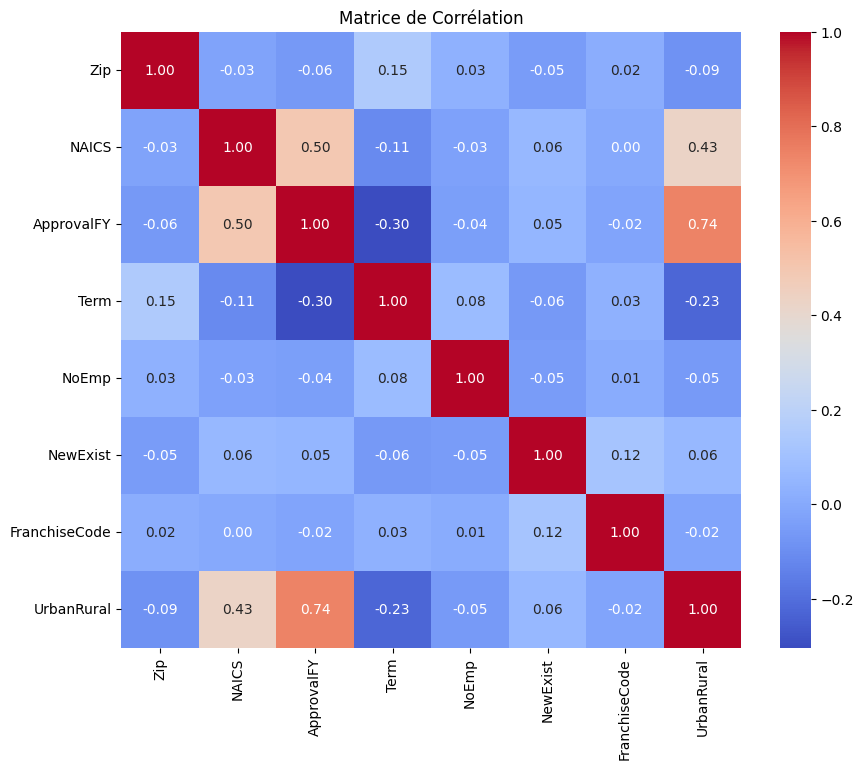

In [6]:
num_col = list(df_EDA.select_dtypes(include=[float,int]).columns)

correlation_matrix = df_EDA[num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation')

plt.show()

In [7]:
# my_report = sv.analyze(df_EDA)
# my_report.show_html()

In [8]:
# df_EDA = df_EDA.drop(['LoanNr_ChkDgt',"ApprovalDate",'City','Bank','CreateJob','RetainedJob'],axis=1)
df_EDA

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,MA,2114,NC,812320,1997,60,40,1,1,0,0,N,P I F,"$25,000.00","$12,500.00"
1,RI,2808,RI,484110,2006,36,1,2,1,2,Y,N,P I F,"$30,000.00","$15,000.00"
2,NH,3060,OH,541330,1999,60,5,2,1,0,Y,N,P I F,"$53,000.00","$26,500.00"
3,NY,14516,OH,321920,1999,60,4,2,1,1,Y,N,P I F,"$35,000.00","$17,500.00"
4,NY,12496,OH,512131,2000,120,3,1,1,1,N,N,P I F,"$112,000.00","$56,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,MN,56283,MN,0,1997,240,12,1,1,0,0,N,P I F,"$325,000.00","$243,750.00"
4993,CT,6716,CA,0,1997,241,3,1,1,0,0,N,CHGOFF,"$310,000.00","$232,500.00"
4994,WI,54914,WI,311812,1997,84,34,1,1,0,N,N,P I F,"$70,000.00","$52,500.00"
4995,TX,79045,TX,442210,1997,60,1,2,1,0,N,Y,P I F,"$35,000.00","$28,000.00"


In [9]:
# Dictionnaire de correspondance des codes NAICS aux catégories
df_EDA['NAICS_Category'] = df_EDA['NAICS'].astype(str).str[:2]
df_EDA['NAICS_Category'] = df_EDA['NAICS_Category'].astype(int)



naics_categories = {
    '0' : 'Inconnue',
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

# Appliquer la correspondance à la colonne contenant les deux premiers chiffres des codes NAICS
df_EDA['NAICS_Category'] = df_EDA['NAICS'].astype(str).str[:2].map(naics_categories)

# On drop la colonne NAICS
df_EDA = df_EDA.drop('NAICS', axis=1)

df_EDA['GrAppv'] = pd.to_numeric(df_EDA['GrAppv'].str.replace('[\$,]', '', regex=True))
df_EDA['SBA_Appv'] = pd.to_numeric(df_EDA['SBA_Appv'].str.replace('[\$,]', '', regex=True))

# Remplace les valeurs étranges de 'RevLineCr' et 'LowDoc' par des Y et N
df_EDA['RevLineCr'] = df_EDA['RevLineCr'].replace(('T','`',',','C','3','2','R','7','A','5','.','4','-','Q'), 'IdK')
df_EDA['RevLineCr'] = df_EDA['RevLineCr'].replace(('0','1'), ('N','Y'))

# Si le montant du prêt est inférieur à 150 000$, il s'agit d'un LowDoc
condition_lowdoc = (df_EDA['GrAppv'] > 150000)
df_EDA.loc[condition_lowdoc, 'LowDoc'] = 'N'
df_EDA.loc[~condition_lowdoc, 'LowDoc'] = 'Y'

df_EDA.head()

,State,Zip,BankState,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,NAICS_Category
0,MA,2114,NC,1997,60,40,1,1,0,N,Y,P I F,25000.0,12500.0,Other Services (except Public Administration)
1,RI,2808,RI,2006,36,1,2,1,2,Y,Y,P I F,30000.0,15000.0,Transportation and Warehousing
2,NH,3060,OH,1999,60,5,2,1,0,Y,Y,P I F,53000.0,26500.0,"Professional, Scientific, and Technical Services"
3,NY,14516,OH,1999,60,4,2,1,1,Y,Y,P I F,35000.0,17500.0,Manufacturing
4,NY,12496,OH,2000,120,3,1,1,1,N,Y,P I F,112000.0,56000.0,Information


<Axes: xlabel='MIS_Status', ylabel='count'>

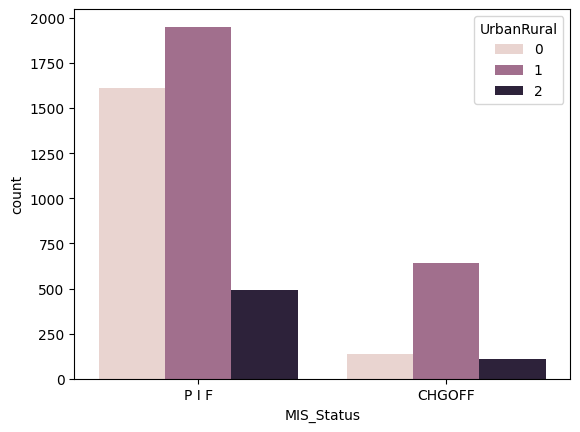

In [10]:
pd.crosstab(df_EDA['MIS_Status'], df_EDA['State'])
sns.countplot(x='MIS_Status', hue='UrbanRural', data=df_EDA)


In [11]:
# Liste des caractéristiques
features_list = ['State', 'Zip', 'BankState', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv', 'NAICS_Category']

# Initialiser les listes catégorielle et numérique
categorical_features = []
numeric_features = []

# Parcourir chaque caractéristique et déterminer son type
for feature in features_list:
    # Déterminer le type de la caractéristique
    if feature in ['State', 'Zip', 'BankState', 'ApprovalFY', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'NAICS_Category']:
        categorical_features.append(feature)
    else:
        numeric_features.append(feature)

# Afficher les listes catégorielle et numérique
print("Caractéristiques catégorielles:", categorical_features)
print("Caractéristiques numériques:", numeric_features)


Caractéristiques catégorielles: ['State', 'Zip', 'BankState', 'ApprovalFY', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'NAICS_Category']
Caractéristiques numériques: ['Term', 'NoEmp', 'FranchiseCode', 'GrAppv', 'SBA_Appv']


In [12]:
categorical_features = ['State', 'Zip', 'BankState', 'ApprovalFY', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'NAICS_Category']
numeric_features = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv']


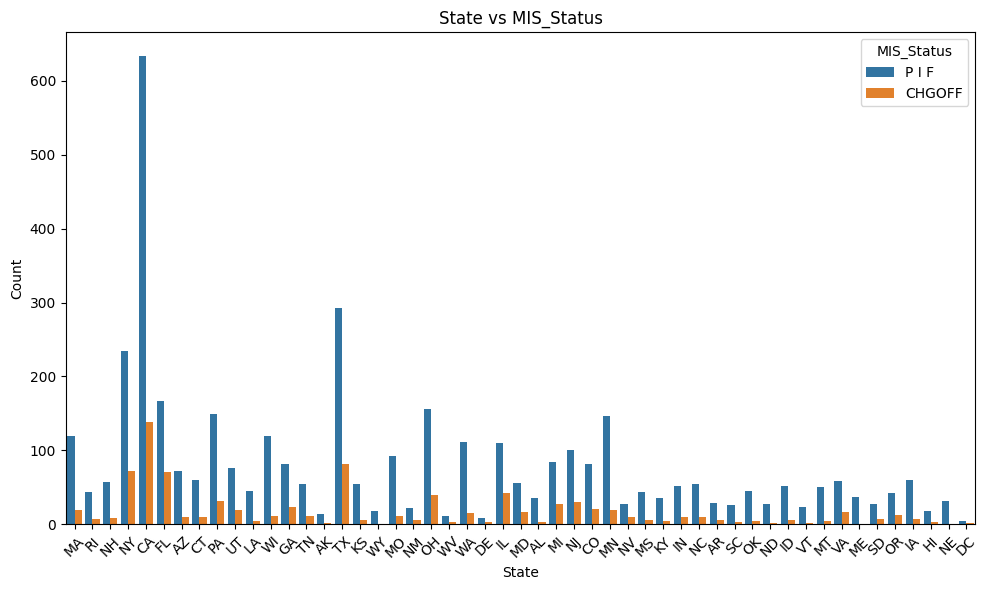

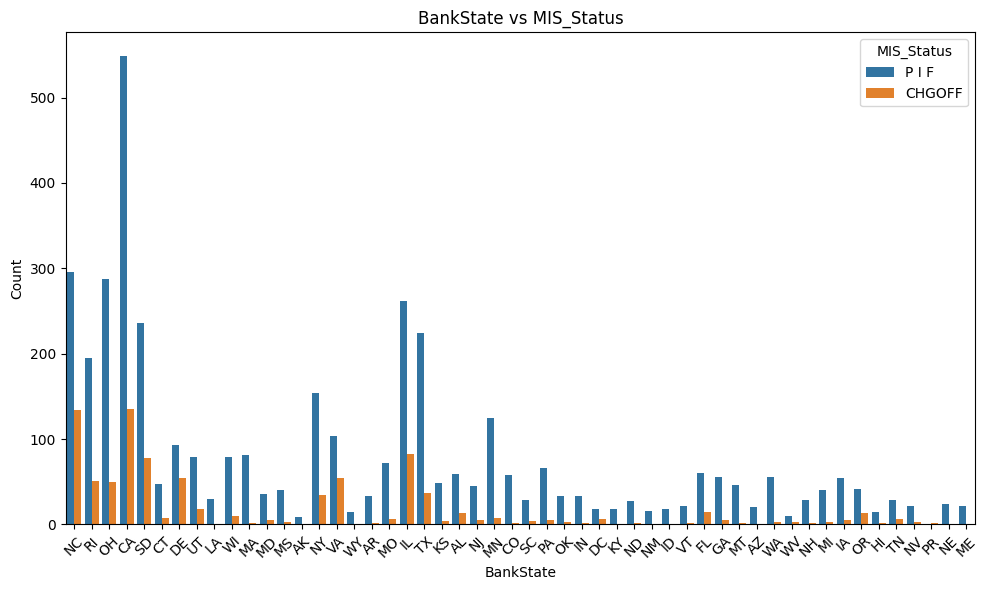

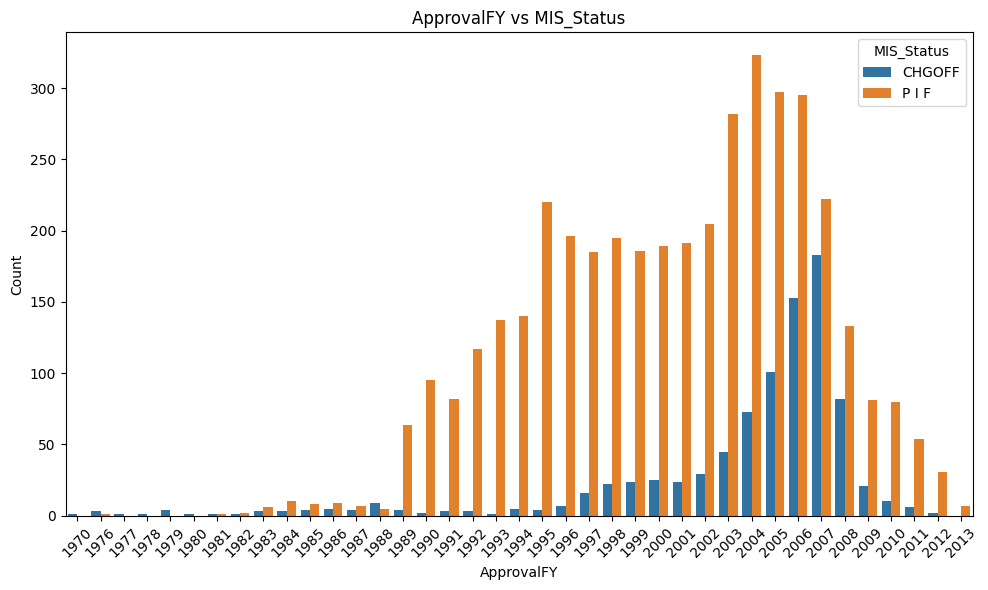

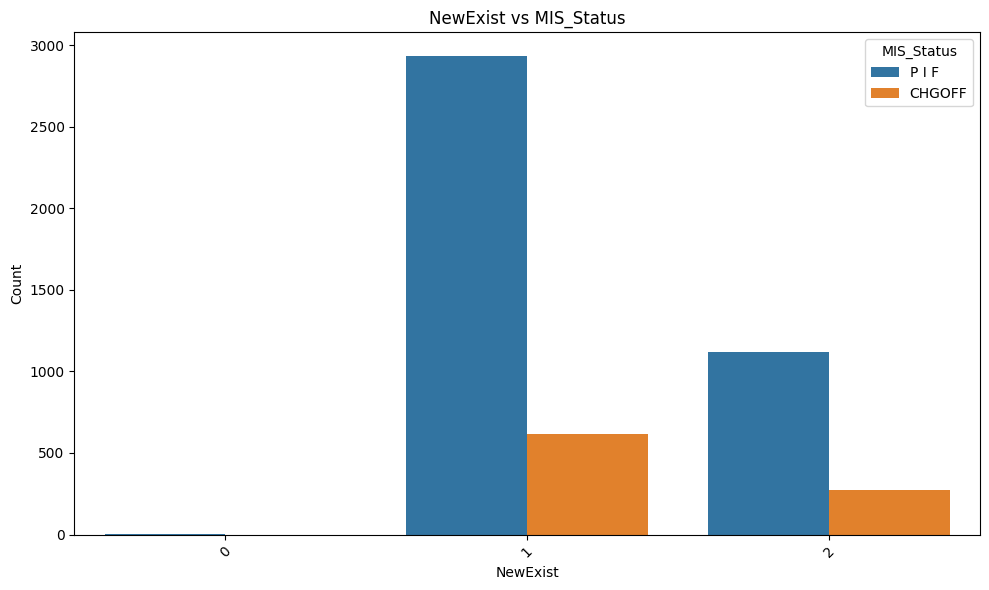

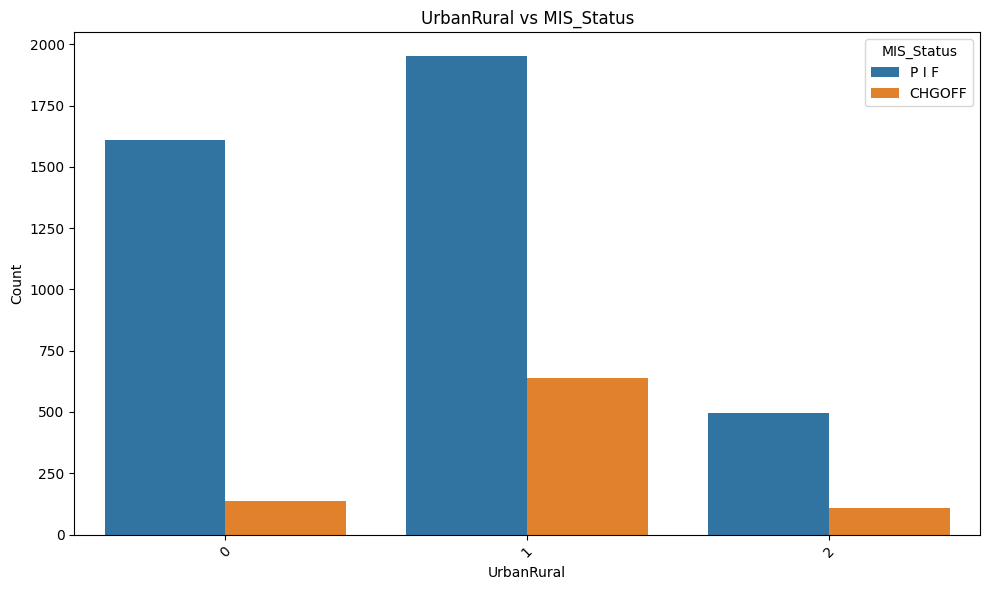

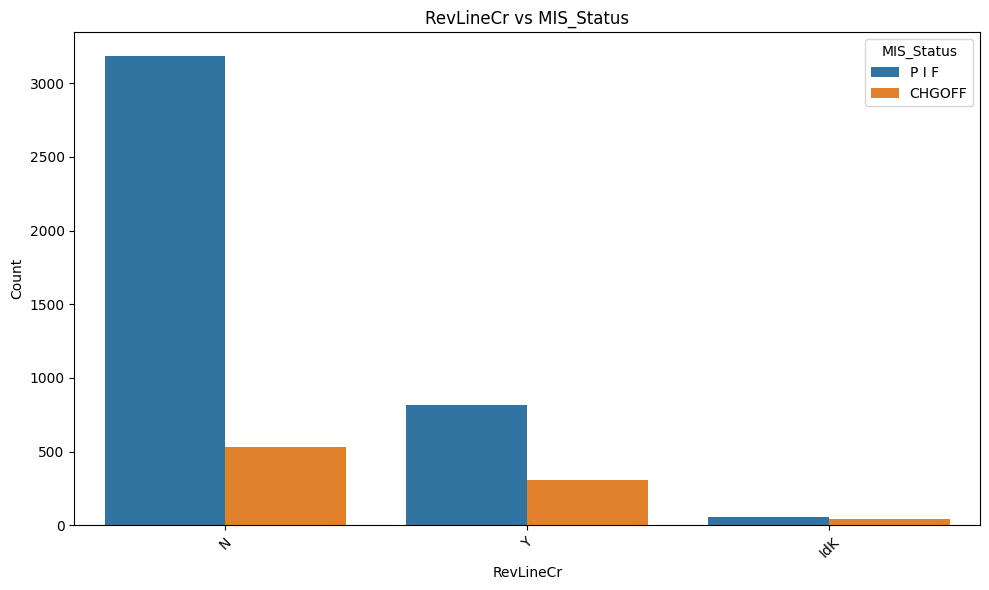

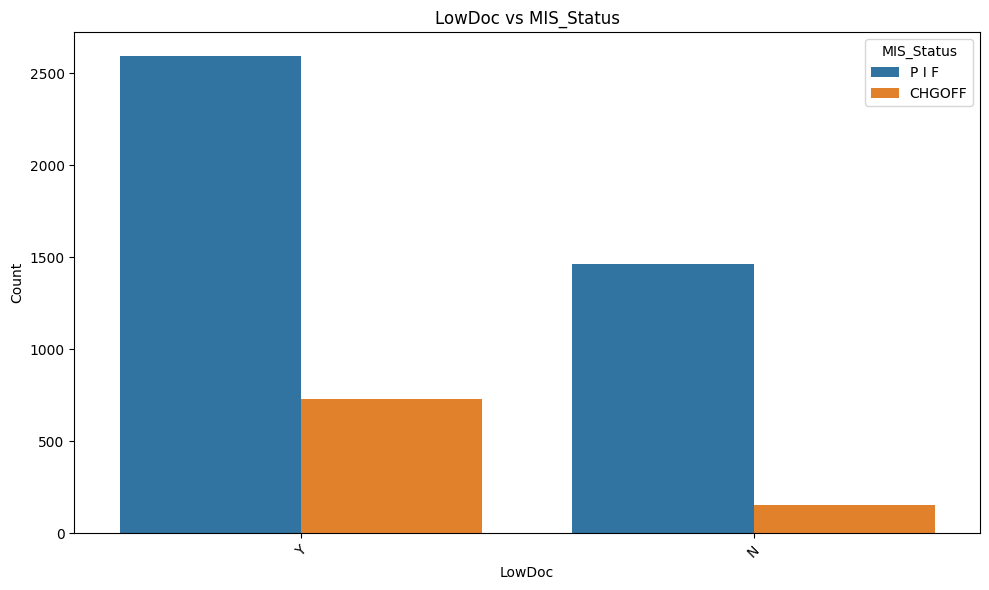

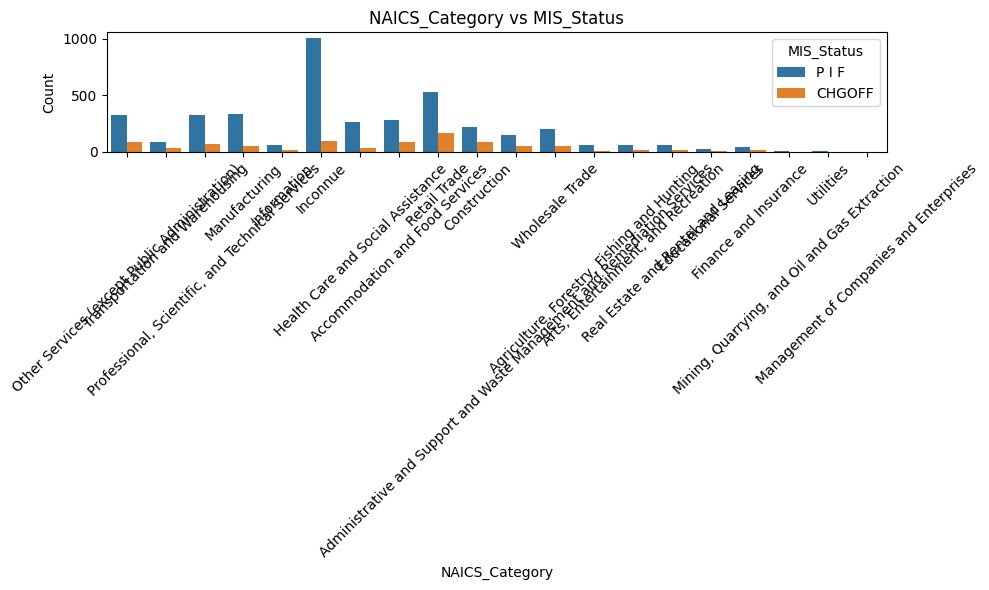

In [13]:
categorical_features_triees = ['State', 'BankState', 'ApprovalFY', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'NAICS_Category']
numeric_features_triees = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv']

for feature in categorical_features_triees:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='MIS_Status', data=df_EDA)
    plt.title(f'{feature} vs MIS_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='MIS_Status', loc='upper right')
    plt.tight_layout()
    plt.show()


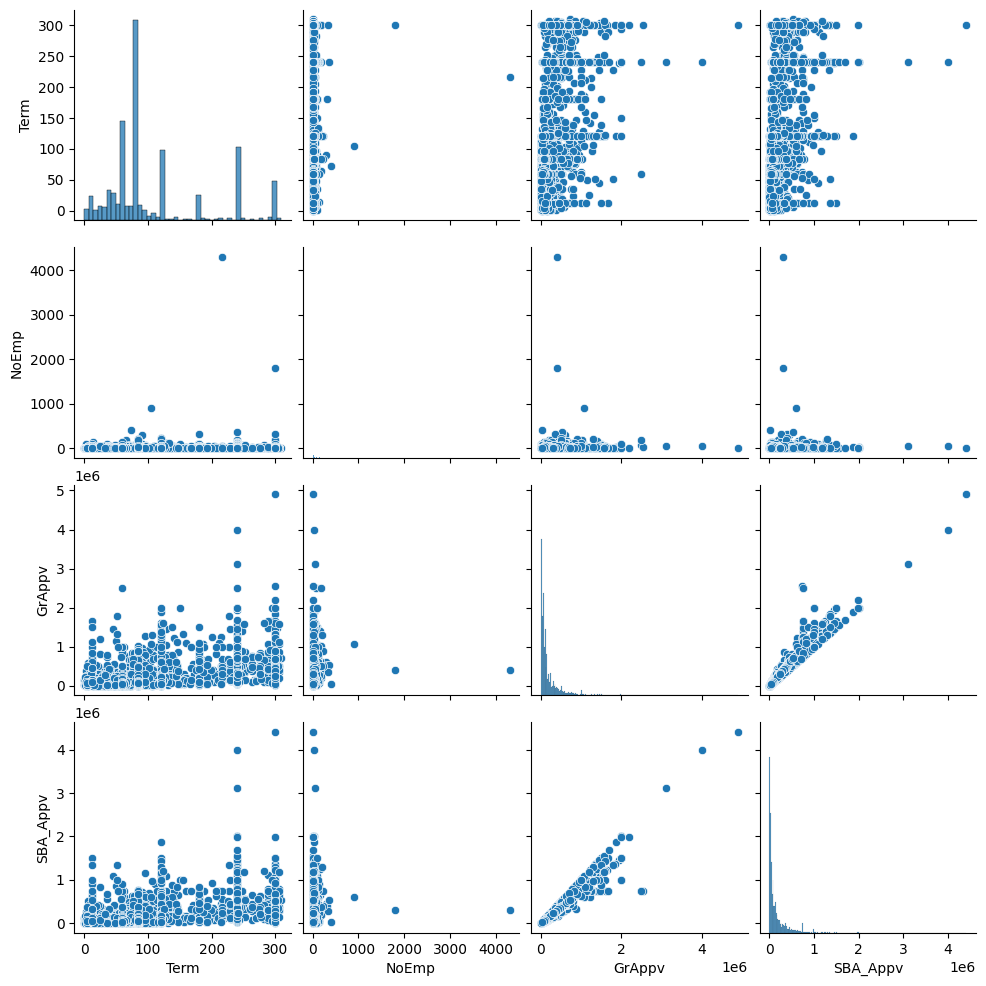

In [14]:
# Liste des caractéristiques numériques
numeric_features = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv']

# Sélection des colonnes numériques dans le DataFrame
df_numeric = df_EDA[numeric_features]

# Création d'un nuage de points entre chaque paire de caractéristiques numériques
sns.pairplot(df_numeric)
plt.show()


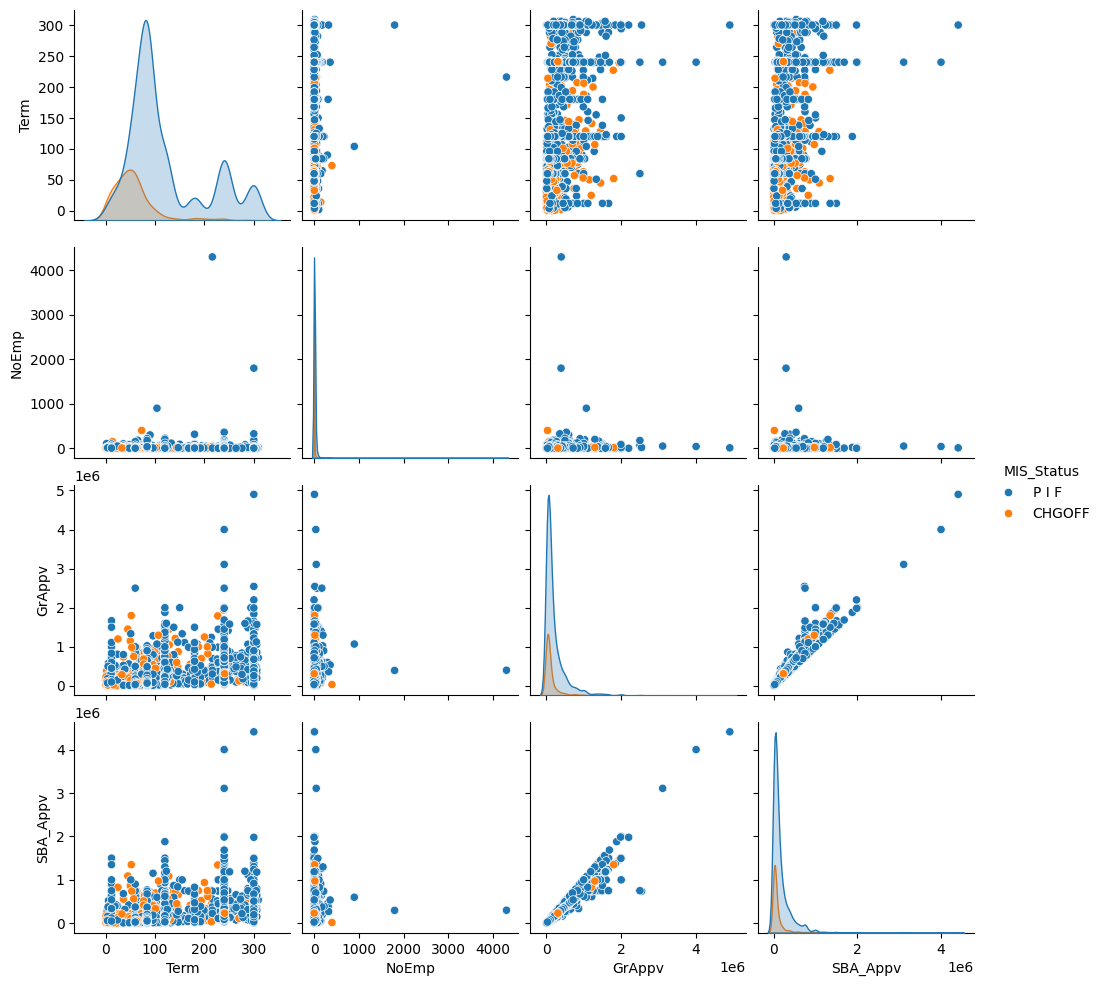

In [15]:
# Liste des caractéristiques numériques
numeric_features = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv']

# Création d'un nuage de points entre chaque paire de caractéristiques numériques avec séparation par la variable cible MIS_Status
sns.pairplot(df_EDA, vars=numeric_features, hue='MIS_Status')
plt.show()

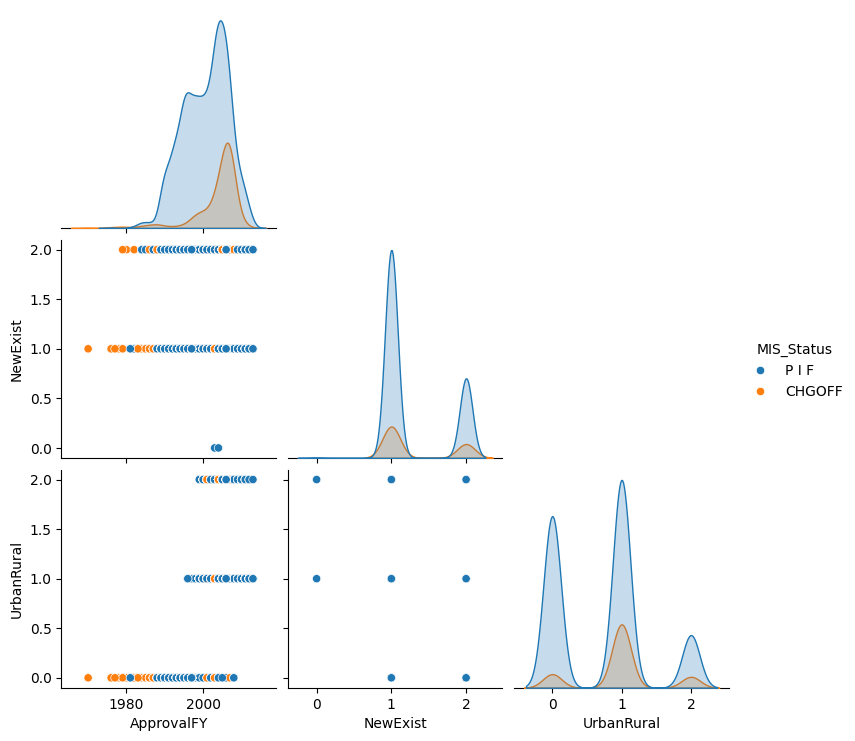

In [16]:
categorical_features_triees = ['State', 'BankState', 'ApprovalFY', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'NAICS_Category']

# Création du pairplot
sns.pairplot(df_EDA[categorical_features_triees + ['MIS_Status']], hue='MIS_Status', corner=True)
plt.show()



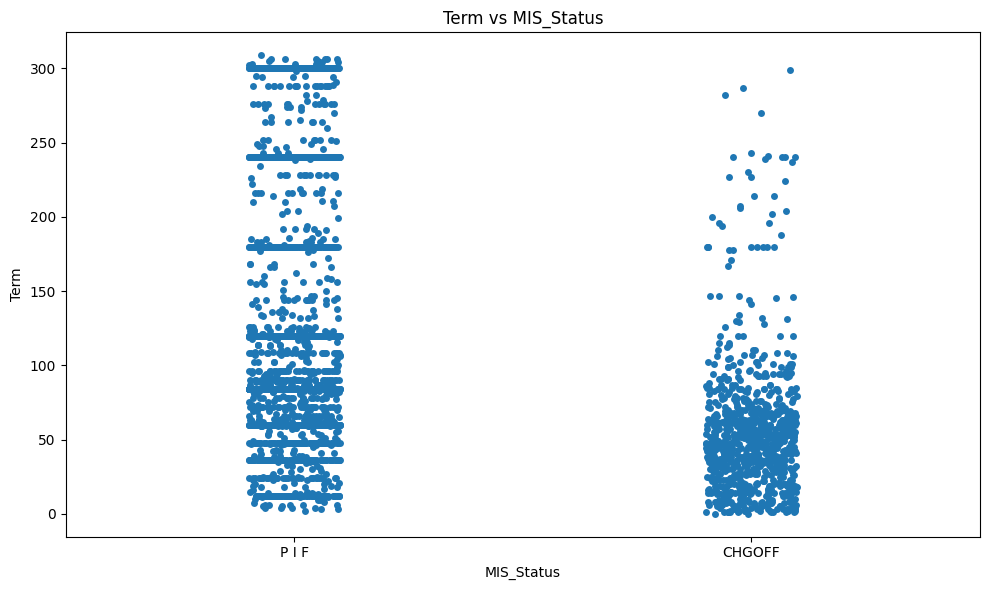

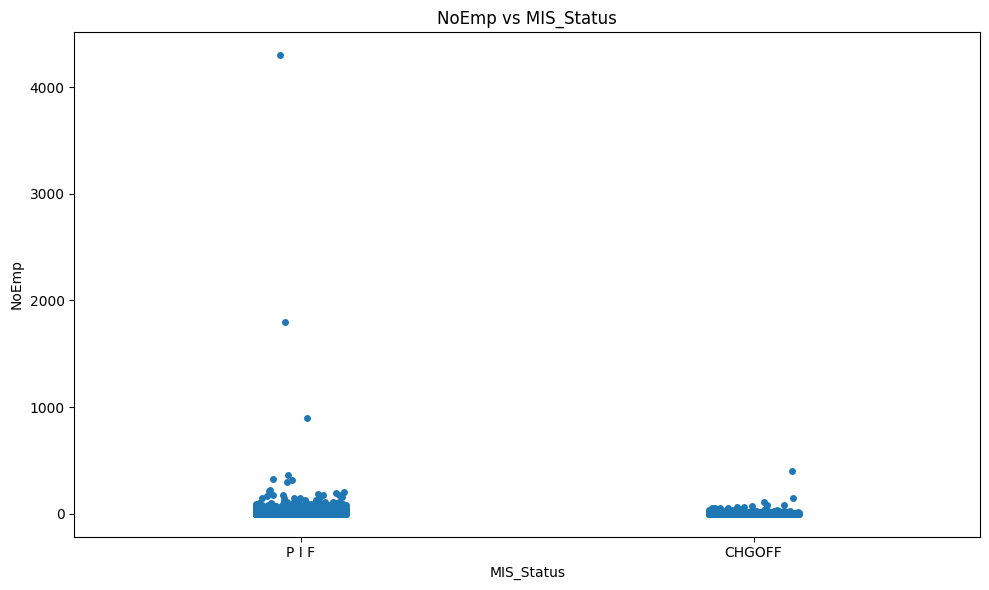

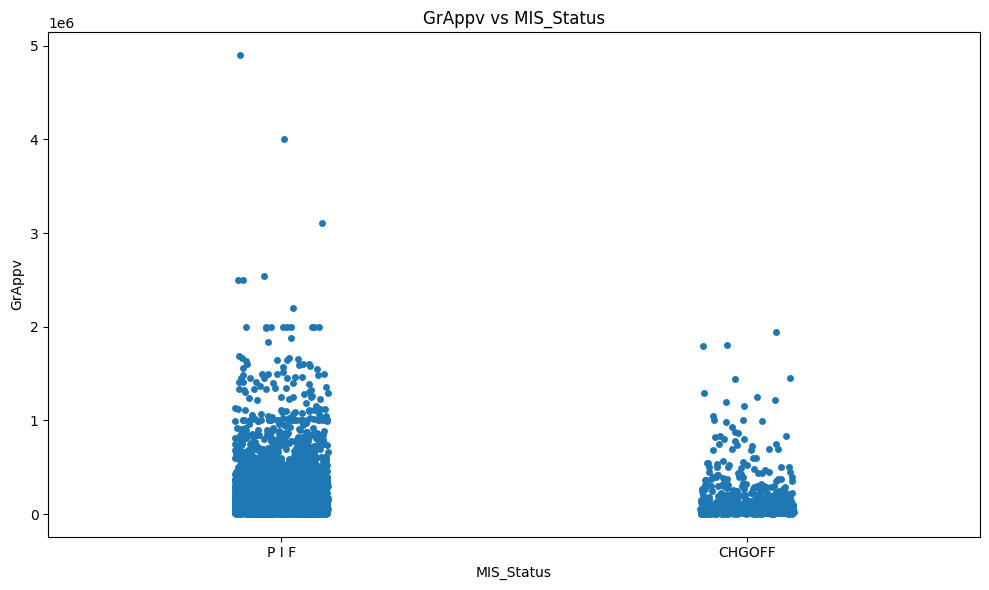

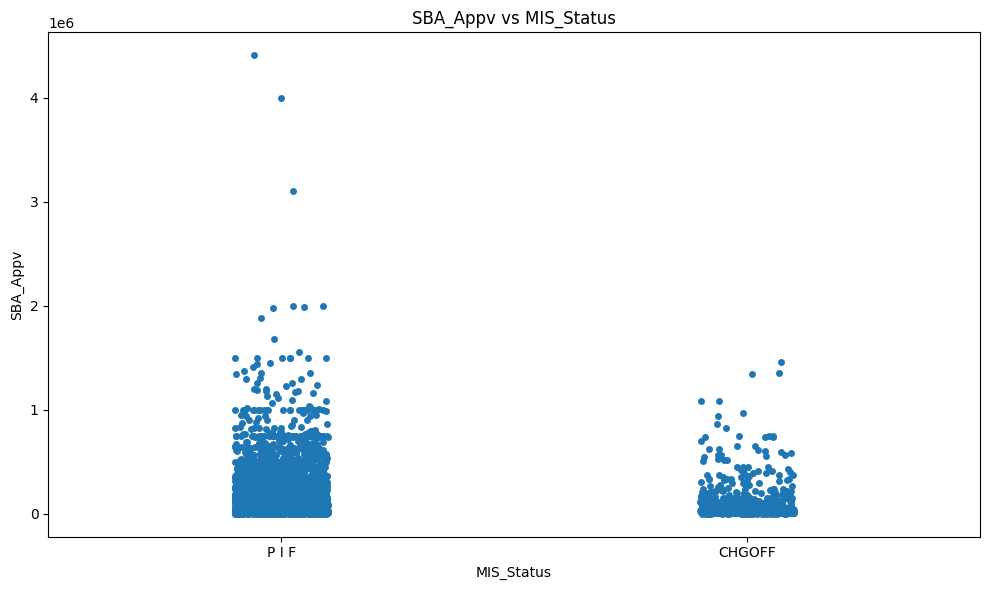

In [17]:
numeric_features = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv']

# Création des nuages de points entre les caractéristiques numériques et la cible
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='MIS_Status', y=feature, data=df_EDA, jitter=True)
    plt.title(f'{feature} vs MIS_Status')
    plt.xlabel('MIS_Status')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()